In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# HS - bulk модуль - 2 компоненты (prop - в процентах)
def get_HS_bulk_bounds(bulk, shear, prop):
    # функция возвращает верхнюю и нижнюю границы HS для объемного модуля сжатия (bulk) композита,
    # состоящего из двух компонент

    # входные данные
    k1, k2 = bulk        # объемные модули сжатия (bulk) 1ой и 2ой компонент
    g1, g2 = shear       # модули сдвига (shear) 1ой и 2ой компонент
    f1 = prop / 100       # объмное содержание 1ой компоненты (f1 - в долях, prop - в %)
    f2 = 1 - prop / 100   # объемное содержание 2ой компоненты

    # случай 1
    if k1 == k2:
        return k

    # случай 2: (k1 > k2) and (g1 > g2) - компонента 1 более жесткая
    if ((k1 - k2) * (g1 - g2) > 0) or (g1 == g2):
        bulk_bounds = sorted([k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3)),
                               k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3))])
    else:
        # случай 3.1: (k1 > k2) but (g1 < g2)
        if k1 > k2:
            if k1 + 0.5 / (1 / (k2 - k1) + 0.5 / (k1 + 4 * g1 / 3)) > k2 + 0.5 / (
                    1 / (k1 - k2) + 0.5 / (k2 + 4 * g2 / 3)):
                bulk_bounds = [k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3)),
                               k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3))]
            else:
                bulk_bounds = [k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3)),
                               k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3))]
        # случай 3.2: (k1 < k2) but (g1 > g2)
        else:
            if k1 + 0.5 / (1 / (k2 - k1) + 0.5 / (k1 + 4 * g1 / 3)) > k2 + 0.5 / (
                    1 / (k1 - k2) + 0.5 / (k2 + 4 * g2 / 3)):
                bulk_bounds = [k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3)),
                               k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3))]
            else:
                bulk_bounds = [k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3)),
                               k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3))]

    return bulk_bounds

In [16]:
# HS - shear модуль - 2 компоненты (prop - в процентах)
def get_HS_shear_bounds(bulk, shear, prop):
    # функция возвращает верхнюю и нижнюю границы HS для модуля сдвига (shear) композита,
    # состоящего из двух компонент

    # входные данные
    k1, k2 = bulk  # объемные модули сжатия (bulk) 1ой и 2ой компонент
    g1, g2 = shear  # модули сдвига (shear) 1ой и 2ой компонент
    f1 = prop / 100  # объмное содержание 1ой компоненты (f1 - в долях, prop - в %)
    f2 = 1 - prop / 100  # объемное содержание 2ой компоненты

    # случай 1
    if g1 == g2:
        return shear

    # случай 2: (k1 > k2) and (g1 > g2) - компонента 1 более жесткая
    if ((k1 - k2) * (g1 - g2) > 0) or (k1 == k2):
        shear_bounds = sorted([g1 + f2 / (1 / (g2 - g1) + 2 * f1 * (k1 + 2 * g1) / (5 * g1 * (k1 + 4 * g1 / 3))),
                               g2 + f1 / (1 / (g1 - g2) + 2 * f2 * (k2 + 2 * g2) / (5 * g2 * (k2 + 4 * g2 / 3)))])
    else:
        if g1 > g2:
            if g2 + 0.5 / (1 / (g1 - g2) + 0.5 / (g2 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (
                    min(bulk) + 2 * min(shear))) / 6)) > g1 + 0.5 / (
                    1 / (g2 - g1) + 0.5 / (g1 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6)):
                shear_bounds = [g1 + f2 / (1 / (g2 - g1) + f1 / (
                                    g1 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6)),
                                g2 + f1 / (
                                        1 / (g1 - g2) + f2 / (
                                            g2 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6))]
            else:
                shear_bounds = [g2 + f1 / (
                    1 / (g1 - g2) + f2 / (g2 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6)),
                            g1 + f2 / (1 / (g2 - g1) + f1 / (
                                    g1 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6))]
        else:
            if g2 + f1 / (1 / (g1 - g2) + f2 / (g2 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (
                    max(bulk) + 2 * max(shear))) / 6)) > g1 + f2 / (
                    1 / (g2 - g1) + f1 / (g1 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6)):
                shear_bounds = [g1 + f2 / (
                        1 / (g2 - g1) + f1 / (g1 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6)),
                                g2 + f1 / (1 / (g1 - g2) + f2 / (
                                        g2 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6))]
            else:
                shear_bounds = [g2 + f1 / (1 / (g1 - g2) + f2 / (
                                        g2 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6)),
                                g1 + f2 / (1 / (g2 - g1) + f1 / (
                                        g1 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6))]

    return shear_bounds

In [34]:
# вспомогательная (prop - в процентах)
def get_proportion_for_HS(prop1, prop2):
    # функция является вспомогательной для нахождения границ HS для многих компонент,
    # на вход принимает процентное содержание двух компонент в составе многих и
    # пересчитывает их в предположении, что в сумме две компоненты дают 100%

    sum = prop1 + prop2
    final_prop = (prop1/sum)*100
    return final_prop

In [35]:
# HS - bulk и shear модули - много компонент (prop - в процентах)
def get_HS_for_many_components(bulk, shear, prop):
    # функция возвращает верхнюю и нижнюю границы HS для bulk и shear модулей композита,
    # состоящего из N компонент

    # на вход подаются два массива, содержащие значения bulk и shear модулей N компонент
    # bulk = [k1, k2, ..., ki, ..., kn], shear = [g1, g2, ..., gi, ..., gn]
    # также подается массив prop, содержащий процентное содержание всех компонент в %

    N = len(bulk)
    if N >= 3:
        for _ in range(N - 2):

            # будем брать в каждом массиве по 2 последних элемента и считать их границы HS
            bulk_for_2 = [bulk[-1], bulk[-2]]
            shear_for_2 = [shear[-1], shear[-2]]
            prop_for_2 = get_proportion_for_HS(prop[-1], prop[-2])

            bulk_bounds = get_HS_bulk_bounds(bulk_for_2, shear_for_2, prop_for_2)
            shear_bounds = get_HS_shear_bounds(bulk_for_2, shear_for_2, prop_for_2)

            bulk[-2] = np.mean(bulk_bounds)
            shear[-2] = np.mean(shear_bounds)
            prop[-2] = prop[-1] + prop[-2]

            bulk.pop(-1)
            shear.pop(-1)
            prop.pop(-1)

            print(bulk)
            print(shear)
            print(prop)

        # когда остались только 2 компоненты, применяем к ним метод HS для двух компонент
        final_bulk_bounds = get_HS_bulk_bounds(bulk, shear, prop[0])
        final_shear_bounds = get_HS_shear_bounds(bulk, shear, prop[0])

    else:   # на случай, если с помощью этой функции хотят посчитать HS для 2х комонент
        final_bulk_bounds = get_HS_bulk_bounds(bulk, shear, prop)
        final_shear_bounds = get_HS_shear_bounds(bulk, shear, prop)

    return final_bulk_bounds, final_shear_bounds

In [54]:
# HS - bulk и shear модули - 2 компоненты - для всех пропорций
def get_HS_for_all_proportions(comp1, comp2, sampling_step = 100):
    # функция рассчитывает границы HS для всех отношений двух компонент
    # на вход принимаются значения упругих модулей и параметр дискретизации

    bulk = [comp1[0], comp2[0]]
    shear = [comp1[1], comp2[1]]

    proportion = []
    bulk_up = []
    bulk_down = []
    shear_up = []
    shear_down = []

    average_bulk = []
    average_shear = []

    for prop in range(sampling_step):
        proportion.append(prop/sampling_step)

        current_bulk = get_HS_bulk_bounds(bulk, shear, prop)
        current_shear = get_HS_shear_bounds(bulk, shear, prop)

        bulk_up.append(current_bulk[1])
        bulk_down.append(current_bulk[0])
        shear_up.append(current_shear[1])
        shear_down.append(current_shear[0])

        average_bulk.append((current_bulk[0] + current_bulk[1])/2)
        average_shear.append((current_shear[0] + current_shear[1]) / 2)

    return proportion, bulk_down, bulk_up, shear_down, shear_up

In [55]:
# HS - bulk и shear модули смеси двух твердых компонент
def get_moduli_by_HS(get_HS_for_all_proportions, comp1, comp2, proportion):
    # proportion - содержание первой компоненты в %

    prop, average_bulk, average_shear = get_HS_for_all_proportions(comp1, comp2)

    index = prop.index(proportion/100)

    return [average_bulk[index], average_shear[index]]

# Решение 

In [106]:
def draw_HS_plots(dol_prop, dol_bulk_d, dol_bulk_u, dol_bulk_average,
                 dol_shear_d, dol_shear_u, dol_shear_average,
                 title = 'Calcite + Dolomite (HS)', xlabel = 'proportion of calcite (unit fractions)',
                 file_name = 'cal+dol.png'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
    fig.suptitle(title, fontsize = 18)

    axes[0].plot(dol_prop, dol_bulk_d, c = 'b')
    axes[0].plot(dol_prop, dol_bulk_u, c = 'r')
    axes[0].plot(dol_prop, dol_bulk_average, c = 'k')
    axes[0].legend(['верхняя граница', 'нижняя граница', 'среднее значение'], fontsize = 11)
    axes[0].scatter(dol_prop[proportion], dol_bulk_average[proportion], c = 'k')
    axes[0].set_title('Bulk Modulus', fontsize = 15)
    axes[0].set_xlabel(xlabel, fontsize = 12)
    axes[0].set_ylabel('bulk modulus (GPa)', fontsize = 12)

    axes[1].plot(dol_prop, dol_shear_d, c = 'b')
    axes[1].plot(dol_prop, dol_shear_u, c = 'r')
    axes[1].plot(dol_prop, dol_shear_average, c = 'k')
    axes[1].legend(['верхняя граница', 'нижняя граница', 'среднее значение'], fontsize = 11)
    axes[1].scatter(dol_prop[proportion], dol_shear_average[proportion], c = 'k')
    axes[1].set_title('Shear Modulus', fontsize = 15)
    axes[1].set_xlabel(xlabel, fontsize = 12)
    axes[1].set_ylabel('shear modulus (GPa)', fontsize = 12)

    fig.tight_layout()
    fig.savefig(file_name)

In [107]:
calcite = [70.8, 30.3]
dolomite = [80.2, 48.8]
anhydrite = [59.1, 31.4]

# кальцит, доломит и ангидрит вместе составляют 85% объема композита. Их объемное содерание равно 40, 30 и 15% соответственно

cal_proportion = 40
dol_proportion = 30
anh_proportion = 15

## кальцит + доломит

In [108]:
dol_prop, dol_bulk_d, dol_bulk_u, dol_shear_d, dol_shear_u = get_HS_for_all_proportions(calcite, dolomite)

dol_bulk_average = []
dol_shear_average = []
for i in range(len(dol_prop)):
    dol_bulk_average.append((dol_bulk_d[i] + dol_bulk_u[i])/2)
    dol_shear_average.append((dol_shear_d[i] + dol_shear_u[i])/2)
    
proportion = round(get_proportion_for_HS(cal_proportion, dol_proportion))
print('содержание кальцита в смеси кальцит+доломит:', proportion)

содержание кальцита в смеси кальцит+доломит: 57


In [109]:
print(dol_bulk_d[0], dol_bulk_u[0])
print(dol_shear_d[0], dol_shear_u[0])

print()
print(dol_bulk_average[0], dol_bulk_average[-1])
print(dol_shear_average[0], dol_shear_average[-1])

80.2 80.2
48.8 48.8

80.2 70.88735761470055
48.8 30.44741716115284


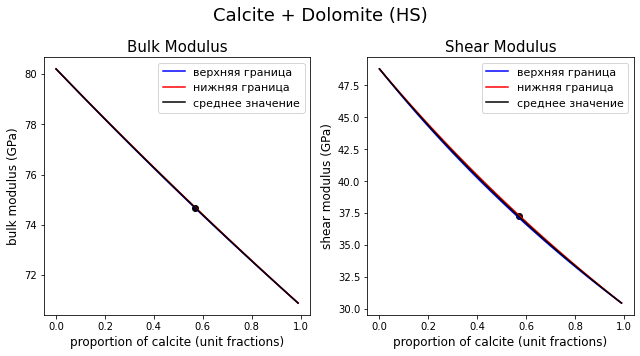

In [110]:
draw_HS_plots(dol_prop, dol_bulk_d, dol_bulk_u, dol_bulk_average,
                 dol_shear_d, dol_shear_u, dol_shear_average,
                 title = 'Calcite + Dolomite (HS)', xlabel = 'proportion of calcite (unit fractions)')

In [111]:
print(dol_prop[proportion])
print(dol_bulk_average[proportion])
print(dol_shear_average[proportion])

0.57
74.67242177325349
37.235859515656436


### проверка на идентичность кальцит+доломит и доломит+кальцит 

In [112]:
dol_prop, dol_bulk_d, dol_bulk_u, dol_shear_d, dol_shear_u = get_HS_for_all_proportions(dolomite, calcite)

dol_bulk_average = []
dol_shear_average = []
for i in range(len(dol_prop)):
    dol_bulk_average.append((dol_bulk_d[i] + dol_bulk_u[i])/2)
    dol_shear_average.append((dol_shear_d[i] + dol_shear_u[i])/2)
    
proportion = round(get_proportion_for_HS(dol_proportion, cal_proportion))
print('содержание кальцита в смеси кальцит+доломит:', proportion)

содержание кальцита в смеси кальцит+доломит: 43


In [113]:
print(dol_prop[proportion])
print(dol_bulk_average[proportion])
print(dol_shear_average[proportion])

0.43
74.67242177325349
37.235859515656436


## смесь (кальцит+доломит) + ангидрит 

In [114]:
cal_dol = [round(dol_bulk_average[proportion], 3), round(dol_shear_average[proportion], 3)]
anhydrite = [59.1, 31.4]

# кальцит, доломит и ангидрит вместе составляют 85% объема композита. Их объемное содерание равно 40, 30 и 15% соответственно

cal_dol_proportion = cal_proportion + dol_proportion
anh_proportion = 15

print('упругие свойства смеси кальцит+доломит',cal_dol)
print('объемное содержание смеси кальцит+доломит',cal_dol_proportion)

упругие свойства смеси кальцит+доломит [74.672, 37.236]
объемное содержание смеси кальцит+доломит 70


In [115]:
anh_prop, anh_bulk_d, anh_bulk_u, anh_shear_d, anh_shear_u = get_HS_for_all_proportions(anhydrite, cal_dol)

anh_bulk_average = []
anh_shear_average = []
for i in range(len(anh_prop)):
    anh_bulk_average.append((anh_bulk_d[i] + anh_bulk_u[i])/2)
    anh_shear_average.append((anh_shear_d[i] + anh_shear_u[i])/2)
    
proportion = round(get_proportion_for_HS(anh_proportion, cal_dol_proportion))
print('содержание ангидрита в смеси кальцит+доломит+ангидрит:', proportion)

содержание ангидрита в смеси кальцит+доломит+ангидрит: 18


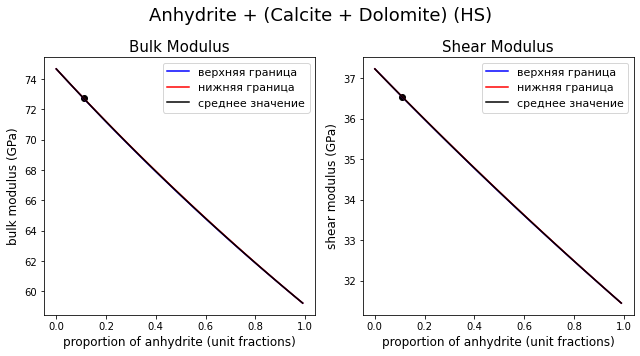

In [123]:
draw_HS_plots(anh_prop, anh_bulk_d, anh_bulk_u, anh_bulk_average,
                 anh_shear_d, anh_shear_u, anh_shear_average,
                 title = 'Anhydrite + (Calcite + Dolomite) (HS)', xlabel = 'proportion of anhydrite (unit fractions)',
                 file_name = 'cal_dol_anh.png')

### попробуем добавить иллит по Хашину-Штрикману 

In [124]:
print(anh_prop[proportion])
print(anh_bulk_average[proportion])
print(anh_shear_average[proportion])

0.11
72.7360235878774
36.5456226062915


In [125]:
cal_dol_anh = [round(anh_bulk_average[proportion], 3), round(anh_shear_average[proportion], 3)]
anhydrite = [59.1, 31.4]
illite = [25.3, 16.3]

# кальцит, доломит и ангидрит вместе составляют 85% объема композита. Их объемное содерание равно 40, 30 и 15% соответственно
# теперь добавим к этой смеси еще 10% иллита

cal_dol_anh_prop = cal_proportion + dol_proportion + anh_proportion
ill_proportion = 10

print('упругие свойства смеси кальцит+доломит',cal_dol_anh)
print('объемное содержание смеси кальцит+доломит', cal_dol__anh_prop)

упругие свойства смеси кальцит+доломит [72.736, 36.546]
объемное содержание смеси кальцит+доломит 85


In [126]:
ill_prop, ill_bulk_d, ill_bulk_u, ill_shear_d, ill_shear_u = get_HS_for_all_proportions(illite, cal_dol_anh)

ill_bulk_average = []
ill_shear_average = []
for i in range(len(ill_prop)):
    ill_bulk_average.append((ill_bulk_d[i] + ill_bulk_u[i])/2)
    ill_shear_average.append((ill_shear_d[i] + ill_shear_u[i])/2)
    
proportion = round(get_proportion_for_HS(ill_proportion, cal_dol_anh_prop))
print('содержание иллита в смеси (кальцит+доломит+ангидрит) + иллит:', proportion)

содержание иллита в смеси (кальцит+доломит+ангидрит) + иллит: 11


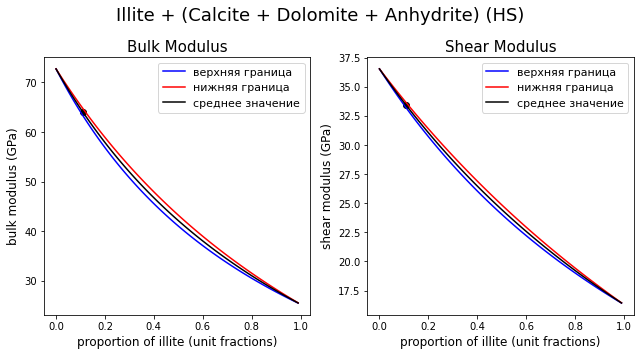

In [127]:
draw_HS_plots(ill_prop, ill_bulk_d, ill_bulk_u, ill_bulk_average,
                 ill_shear_d, ill_shear_u, ill_shear_average,
                 title = 'Illite + (Calcite + Dolomite + Anhydrite) (HS)', xlabel = 'proportion of illite (unit fractions)',
                 file_name = 'cal_dol_anh_ill(HS).png')

In [122]:
print(ill_prop[proportion])
print(ill_bulk_average[proportion])
print(ill_shear_average[proportion])

0.11
63.10984719197283
33.05492220506396
